<a href="https://colab.research.google.com/github/Ananthzeke/Optimization-techniques/blob/main/simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy import asarray,exp
from numpy.random import rand,randn,seed,uniform

In [44]:
def objective(x):
	return  (x[0]**2+x[1]-11)**2 +(x[0]+x[1]**2-7)**2

In [45]:


def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    best =uniform(bounds[0][0],bounds[0][1],2)
    best_eval = objective(best)
    curr, curr_eval = best, best_eval
    best_track = []
    for i in range(n_iterations):
        candidate = curr + randn(2) * step_size
        candidate_eval = objective(candidate)
        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
            print(f'>iteration {i}: f{best} = {best_eval}')
            best_track.append(best)
        diff = candidate_eval - curr_eval
        t = temp / float(i + 1)
        metropolis = exp(-diff / t)
        if diff < 0 or rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval
    return best, best_eval,best_track



In [46]:
seed(1)
bounds = asarray([[0, 5.0]])
n_iterations = 1000
step_size = 0.1
temp = 10
print('Starting simulated annealing algorithm\n')
best, score,best_track = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('\nSimulated annealing completed\n')
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

Starting simulated annealing algorithm

>iteration 0: f[2.03229285 3.4943256 ] = 63.849048170775774
>iteration 1: f[2.11883361 3.26417174] = 43.873976449973725
>iteration 2: f[2.29331479 3.18805105] = 36.29473103187055
>iteration 3: f[2.3252187  3.16311401] = 34.32041128640973
>iteration 4: f[2.47142949 2.95709994] = 21.517534484882944
>iteration 5: f[2.43918777 2.9186945 ] = 20.20950048216406
>iteration 6: f[2.55256471 2.80870537] = 14.651166540884514
>iteration 7: f[2.53532189 2.72091953] = 12.063132543688804
>iteration 9: f[2.64951615 2.60796002] = 7.889931628759002
>iteration 11: f[2.63722712 2.51438307] = 6.18193942917511
>iteration 15: f[2.66479893 2.40531558] = 4.334127003123745
>iteration 18: f[2.8690018  2.45006765] = 3.6053685203030725
>iteration 20: f[2.96735726 2.41713127] = 3.325103810228632
>iteration 21: f[2.85310544 2.38219699] = 2.5627805487997386
>iteration 32: f[2.83087262 2.36212119] = 2.3789042559639886
>iteration 38: f[2.80312656 2.33598894] = 2.2379568694679657
>

In [47]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def plot_optimization(fitness,minx,maxx,best_pos_track,levels):
    x = np.linspace(minx,maxx,300)
    X1,X2 = np.meshgrid(x,x)
    X = np.dstack([X1,X2])
    Y = np.apply_along_axis(fitness,-1,X)
    plt.figure(figsize=(10,10))
    plt.contourf(X1,X2,Y,levels=levels,cmap="Blues")
    x,y = np.array(best_pos_track).T
    plt.plot(x,y,"r")
    plt.plot(*best_pos_track[0],"o",label="start")
    plt.plot(*best_pos_track[-1],"X",label="end")
    plt.legend()
    plt.show()

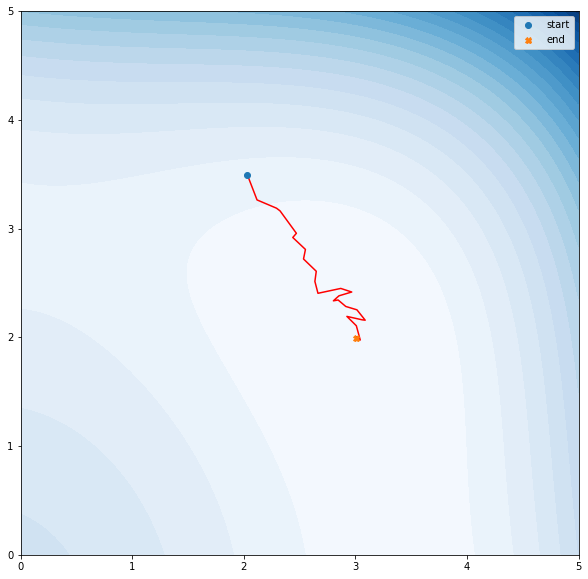

In [53]:
plot_optimization(objective,0,5,best_track,25)